In [1]:
import cv2

In [2]:
haar_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [3]:
img = cv2.imread('img_1.jpg')

In [4]:
haar_data.detectMultiScale(img)

array([[533,  43, 170, 170],
       [217,  76, 186, 186],
       [206, 321, 133, 133],
       [632, 252,  63,  63],
       [290,  92, 157, 157]], dtype=int32)

In [8]:
img = cv2.imread('img_1.jpg')
faces = haar_data.detectMultiScale(img,1.28)
while True:
    for x,y,w,h in faces:
        # img, (x,y), (width, height), (b,g,r), borderWidth
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 4)
    cv2.imshow('result', img)
    if cv2.waitKey(2) == 27:
        break

cv2.destroyAllWindows()

In [10]:
faces_list = []
capture = cv2.VideoCapture('video_1.mp4')
while True:
    flag, img = capture.read()
    img = cv2.resize(img, None, fx=0.5, fy=0.5)
    if flag:
        faces = haar_data.detectMultiScale(img,1.28)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 4)
            
            face = img[y:y+h, x:x+w, :]
            face = cv2.resize(face, (100,100))
            faces_list.append(face)
        
        cv2.imshow('result', img)
        if cv2.waitKey(2) == 27:
            break
    else:
        print("Video not found")

cv2.destroyAllWindows()

In [11]:
len(faces_list)

945

In [12]:
import numpy as np

In [13]:
faces_list = np.asarray(faces_list)

In [14]:
faces_list.shape

(945, 100, 100, 3)

In [15]:
import matplotlib.pyplot as plt

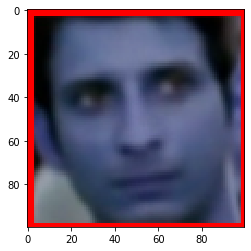

In [20]:
plt.imshow(faces_list[141])